# Perceptron Multi Capa

### Cargamos el conjunto de dígitos

In [1]:
from keras.datasets import mnist

(train_X, train_Y),(test_X, test_Y) = mnist.load_data()

train_X = train_X.reshape((60000), (28*28))
test_X = test_X.reshape((10000), (28*28))

train_x = train_X[:-40000]          # conjuntos mas pequeños
test_x = test_X[-5000:]
train_y = train_Y[:-40000]
test_y = test_Y[-5000:]

# print(train_X.shape)
# print(test_X.shape)
# print(train_Y.shape)
# print(test_Y.shape)

11490434/11490434 [==============================] - 1s 0us/step


### Preparamos la validación cruzada

In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold

crossV = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=3,
    random_state=448
)

### Red multi capa

In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    random_state=448,
    activation="relu",
    solver="adam",
    early_stopping=True,
    verbose=True
)

### Ajuste hiper parámetros

In [4]:
from sklearn.model_selection import GridSearchCV

hyperMLP = dict(
    batch_size=[256,512],                                   # tamaño de los lotes
    hidden_layer_sizes=[(400,200), (800,400,200)],          # capas
    max_iter = [10,30],                                      # epocas
)

### Búsqueda de la mejor combinación

In [7]:
search = GridSearchCV(
    estimator=mlp,
    param_grid=hyperMLP,
    cv=crossV,
    n_jobs=-1,
    scoring="accuracy",
    verbose=100
)

### Ejecución

In [8]:
search.fit(train_x, train_y)

Fitting 15 folds for each of 8 candidates, totalling 120 fits


KeyboardInterrupt: ignored

### Error

In [ ]:
error_rate = (1 - search.score(test_X, test_Y)) * 100
print(error_rate)

2.8200000000000003


# Visualización

In [ ]:
import pandas as pd

# resultados del gridsearch

results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("setting")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
setting,,,,
"256_(800, 400, 200)_30","{'batch_size': 256, 'hidden_layer_sizes': (800...",1,0.951733,0.007520
"256_(400, 200)_30","{'batch_size': 256, 'hidden_layer_sizes': (400...",2,0.949883,0.006178
"256_(800, 400, 200)_10","{'batch_size': 256, 'hidden_layer_sizes': (800...",3,0.945817,0.003220
"512_(800, 400, 200)_30","{'batch_size': 512, 'hidden_layer_sizes': (800...",4,0.940383,0.005650
"512_(800, 400, 200)_10","{'batch_size': 512, 'hidden_layer_sizes': (800...",5,0.939233,0.005020
"256_(400, 200)_10","{'batch_size': 256, 'hidden_layer_sizes': (400...",6,0.938233,0.003565
"512_(400, 200)_30","{'batch_size': 512, 'hidden_layer_sizes': (400...",7,0.935450,0.005279
"512_(400, 200)_10","{'batch_size': 512, 'hidden_layer_sizes': (400...",8,0.931300,0.004262


# Mejor resultado

In [7]:
from sklearn.neural_network import MLPClassifier

mlp2 = MLPClassifier(
    random_state=448,
    activation="relu",
    solver="adam",
    early_stopping=True,
    batch_size=256,
    hidden_layer_sizes=(800,400,200),
    max_iter=30,
    verbose=True
)

In [8]:
mlp2.fit(train_X,train_Y)       # conjunto grande

Iteration 1, loss = 1.74945583
Validation score: 0.930333
Iteration 2, loss = 0.19049303
Validation score: 0.950167
Iteration 3, loss = 0.09577292
Validation score: 0.957167
Iteration 4, loss = 0.05641597
Validation score: 0.960167
Iteration 5, loss = 0.03808010
Validation score: 0.961333
Iteration 6, loss = 0.03927860
Validation score: 0.960333
Iteration 7, loss = 0.04008458
Validation score: 0.963000
Iteration 8, loss = 0.06210206
Validation score: 0.957167
Iteration 9, loss = 0.06952830
Validation score: 0.965833
Iteration 10, loss = 0.04639308
Validation score: 0.964167
Iteration 11, loss = 0.04009616
Validation score: 0.962667
Iteration 12, loss = 0.03962892
Validation score: 0.961500
Iteration 13, loss = 0.06495587
Validation score: 0.971167
Iteration 14, loss = 0.04202237
Validation score: 0.967000
Iteration 15, loss = 0.05724353
Validation score: 0.962833
Iteration 16, loss = 0.03983689
Validation score: 0.974167
Iteration 17, loss = 0.04132177
Validation score: 0.965333
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=256, early_stopping=True,
              hidden_layer_sizes=(800, 400, 200), max_iter=30, random_state=448,
              verbose=True)

In [9]:
accuracy = mlp2.score(test_X, test_Y)
error_rate = (1 - accuracy) * 100
print(f"Precisión: {accuracy}\nError: {error_rate}")

Precisión: 0.9758
Error: 2.42


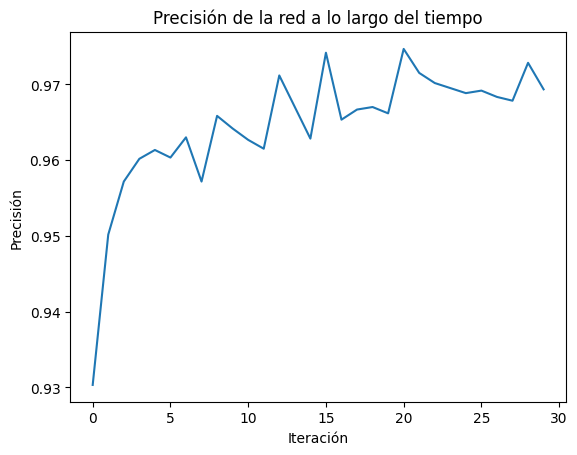

In [18]:
import matplotlib.pyplot as plt
plt.plot(mlp2.validation_scores_)
plt.title('Precisión de la red a lo largo del tiempo')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.show()


### Imprimimos los resultados

In [ ]:
prediccion = mlp2.predict(test_X)
# etiquetas = prediccion.argmax(axis=1)
etiquetas = prediccion

result = ""

for v in etiquetas:
    result += str(v)

with open('results\mlp.txt', 'w', encoding='utf-8') as f:
    f.write(result)